In [1]:
#import basic packages to read and explore data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data
df=pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
#Just look to see the basics of what we have
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


This is what the variables we have here represent



Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


In [4]:
#Do we have any missing values?
df.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [5]:
#No missing values. Let's split off the target and create a different dataframe with features.
y=df["Y"]
X=df.drop(columns=["Y"])

In [6]:
X.shape

(126, 6)

In [7]:
#Overall look at how the values are distributed
X.describe()

,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:>

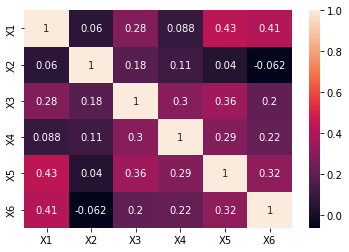

In [8]:
cor=X.corr()
sns.heatmap(cor, annot=True)

In [9]:
#We can see what percentage of our sample are satifised.
print("Percentage of satisfied customers: ",y.mean()*100,'%')

Percentage of satisfied customers:  54.761904761904766 %


In [10]:
X[y==0].describe()

,X1,X2,X3,X4,X5,X6
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
std,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
min,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
X[y==1].describe()

,X1,X2,X3,X4,X5,X6
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
std,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
75%,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see some differences. The "on time" minimum for satisfied customers was 3 while we had values below three for non satisfied customers. There was also a significant difference in the means for X1 and X5 both of which related to delivery

# Modeling

In [12]:
#import modules to create a Random Forest model and assess it
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
#set up a hyper parameter grid for a random forest classifier
params_rf={'n_estimators': [50, 100, 150, 200],
 'max_depth': [2, 5, 10, None]}

In [14]:
#Create the grid search object and fit it 
rf_grid=GridSearchCV(RandomForestClassifier(),params_rf,scoring="accuracy",cv=3,verbose=1)
rf_grid.fit(X,y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [15]:
y_pred_rf=rf_grid.predict(X)

In [16]:
print(confusion_matrix(y,y_pred_rf))

[[42 15]
 [ 5 64]]


In [18]:
print(accuracy_score(y,y_pred_rf))

0.8412698412698413


In [20]:
#try LightGBM
from lightgbm import LGBMClassifier

In [21]:
lgbmparams = {'num_leaves':[10,20,30,40],
             'max_depth':[1,2,4,-1],
             'n_estimators':[50,100,150,200],
             'learning_rate':[0.01,0.1,0.2],
              'reg_alpha':[0,0.01,0.1],
              'reg_lambda':[0,0.01,0.1]
             }
             

In [22]:
#set up grid search for LightGBM and fit to training data
lgb_grid=GridSearchCV(LGBMClassifier(),lgbmparams,scoring="accuracy",cv=3,verbose=1)

In [23]:
lgb_grid.fit(X,y)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 4, -1],
                         'n_estimators': [50, 100, 150, 200],
                         'num_leaves': [10, 20, 30, 40],
                         'reg_alpha': [0, 0.01, 0.1],
                         'reg_lambda': [0, 0.01, 0.1]},
             scoring='accuracy')

In [25]:
y_pred_lg=lgb_grid.predict(X)

In [27]:
print(accuracy_score(y,y_pred_lg))

0.8015873015873016


See if some feature engineering can improve things

In [28]:
X["num_good_scores"]=(X>3).sum(axis=1)

In [29]:
X.head()

,X1,X2,X3,X4,X5,X6,num_good_scores
0,3,3,3,4,2,4,2
1,3,2,3,5,4,3,2
2,5,3,3,3,3,5,2
3,5,4,3,3,3,5,3
4,5,4,3,3,3,5,3


In [30]:
X_old=X[["X1","X2","X3","X4","X5","X6"]]

In [31]:
X['num_bad_scores']=(X_old<3).sum(axis=1)

In [32]:
X.head()

,X1,X2,X3,X4,X5,X6,num_good_scores,num_bad_scores
0,3,3,3,4,2,4,2,1
1,3,2,3,5,4,3,2,1
2,5,3,3,3,3,5,2,0
3,5,4,3,3,3,5,3,0
4,5,4,3,3,3,5,3,0


In [33]:
X[y==0].num_good_scores.describe()

count    57.000000
mean      3.140351
std       1.528755
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: num_good_scores, dtype: float64

In [34]:
X[y==1].num_good_scores.describe()

count    69.000000
mean      3.797101
std       1.219688
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: num_good_scores, dtype: float64

In [35]:
for i in range(1,6):
    colname="number_of_scores_of_"+str(i)
    X[colname]=(X_old==i).sum(axis=1)

In [36]:
X.head()

,X1,X2,X3,X4,X5,X6,num_good_scores,num_bad_scores,number_of_scores_of_1,number_of_scores_of_2,number_of_scores_of_3,number_of_scores_of_4,number_of_scores_of_5
0,3,3,3,4,2,4,2,1,0,1,3,2,0
1,3,2,3,5,4,3,2,1,0,1,3,1,1
2,5,3,3,3,3,5,2,0,0,0,4,0,2
3,5,4,3,3,3,5,3,0,0,0,3,1,2
4,5,4,3,3,3,5,3,0,0,0,3,1,2


In [37]:
rf_grid2=GridSearchCV(RandomForestClassifier(),params_rf,scoring="accuracy",cv=3,verbose=1)
rf_grid2.fit(X,y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [95]:
rf_grid2.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [38]:
y_pred_rf2=rf_grid2.predict(X)

In [39]:
print(accuracy_score(y,y_pred_rf2))

0.6984126984126984


In [40]:
lgb_grid2=GridSearchCV(LGBMClassifier(),lgbmparams,scoring='accuracy',cv=3,verbose=1)
lgb_grid2.fit(X,y)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 4, -1],
                         'n_estimators': [50, 100, 150, 200],
                         'num_leaves': [10, 20, 30, 40],
                         'reg_alpha': [0, 0.01, 0.1],
                         'reg_lambda': [0, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

In [41]:
y_pred_lg2=lgb_grid2.predict(X)

In [43]:
print(accuracy_score(y,y_pred_lg2))

0.9047619047619048


In [44]:
lgb_grid2.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 200,
 'num_leaves': 10,
 'reg_alpha': 0,
 'reg_lambda': 0}

In [45]:
feature_importances=list(zip(lgb_grid2.best_estimator_.feature_name_,lgb_grid2.best_estimator_.feature_importances_))

In [46]:
feature_imp_df=pd.DataFrame(feature_importances,columns=["Feature","Importance"])

In [50]:
feature_imp_df.sort_values("Importance",ascending=False)

,Feature,Importance
11,number_of_scores_of_4,128
1,X2,97
6,num_good_scores,78
4,X5,75
10,number_of_scores_of_3,69
9,number_of_scores_of_2,58
2,X3,57
0,X1,55
12,number_of_scores_of_5,36
5,X6,25


In [52]:
rf_feature_importances=list(zip(rf_grid.best_estimator_.feature_names_in_,rf_grid.best_estimator_.feature_importances_))

In [53]:
feature_imp_rf_df=pd.DataFrame(rf_feature_importances,columns=["Feature","Importance"])

In [54]:
feature_imp_rf_df.sort_values("Importance",ascending=False)

,Feature,Importance
0,X1,0.214935
4,X5,0.189655
5,X6,0.170439
3,X4,0.157294
2,X3,0.143782
1,X2,0.123896


Summary: Our best accuracy came from using a LightGBM model with some additional features relating to how many times the customer gave a particular score and how many good and bad scores there were. This had a 90.5% accuracy. To see which of the questions were most relevant, we looked at the Random Forest Model with just the original features. This suggested that "X1" and "X5" which represented on-time and satisfaction with the courier where the most important, with "on-time" being the most significant individual feature. There were no questions with very small importance, so I would not suggest removing any questions. The model using our extended feature set suggests that in general having a reasonable number of scores above 3 will also predict satisfaction.